In [1]:
import numpy as np
import glob
import scipy.integrate
import scipy.interpolate
import scipy.stats
import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('text', usetex=True)

## Analysis of CG Surface hopping for hexane
Tristan Bereau (MPIP, 2018)

All units of the free energy surfaces (FES) in $k_{\rm B}T$.

## AA

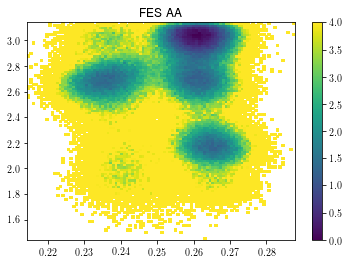

In [16]:
timeSer_aa = np.genfromtxt('aa_traj.dat')
x, y = timeSer_aa.T[1], timeSer_aa.T[3]*np.pi/180
H_aa, xedges, yedges = np.histogram2d(x, y, bins=100, normed=True)
H_aa = H_aa.T
X, Y = np.meshgrid(xedges, yedges)
fes_aa = -np.ma.log(H_aa/H_aa.max())
plt.pcolormesh(X, Y, fes_aa, vmax=4.0)
plt.colorbar()
plt.title("FES AA")
plt.show()

## CG Force matching

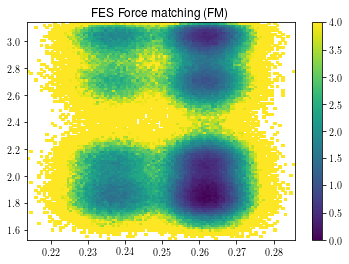

In [17]:
timeSer_fm = np.genfromtxt('1state/cvs_time.dat')
x, y = timeSer_fm.T[1], timeSer_fm.T[3]
H_fm, xedges, yedges = np.histogram2d(x, y, bins=100, normed=True)
H_fm = H_fm.T
X, Y = np.meshgrid(xedges, yedges)
fes_fm = -np.ma.log(H_fm/H_fm.max())
plt.pcolormesh(X, Y, fes_fm, vmax=4.0)
plt.colorbar()
plt.title("FES Force matching (FM)")
plt.show()

MAE(FM vs AA): 1.462 kT


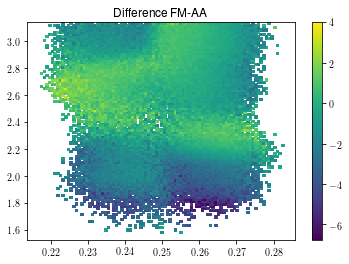

In [12]:
fesfmaa = (fes_fm-fes_aa).compressed()
mae_fmaa = np.mean([abs(fesfmaa[i]) for i in range(len(fesfmaa))])
print "MAE(FM vs AA): {:.3f} kT".format(mae_fmaa)

plt.pcolormesh(X, Y, fes_fm - fes_aa, vmax=4.0)
plt.title("Difference FM-AA")
plt.colorbar()
plt.show()

## CG iter-gYBG

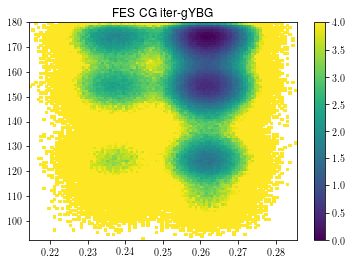

In [19]:
timeSer_gYBG = np.genfromtxt('iter-gYBG_traj.dat')
x, y = timeSer_gYBG.T[1], timeSer_gYBG.T[3]
H_ybg, xedges, yedges = np.histogram2d(x, y, bins=100, normed=True)
H_ybg = H_ybg.T
X, Y = np.meshgrid(xedges, yedges)
fes_ybg = -np.ma.log(H_ybg/H_ybg.max())
plt.pcolormesh(X, Y, fes_ybg, vmax=4.0)
plt.colorbar()
plt.title("FES CG iter-gYBG")
plt.show()

## CG Surface Hop 2S

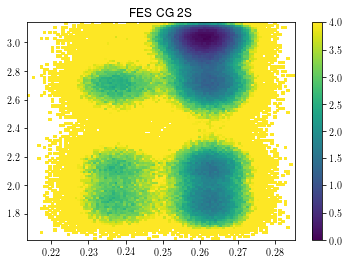

In [31]:
timeSer_2s = np.genfromtxt('2states/cvs_time.dat')
x, y = timeSer_2s.T[1], timeSer_2s.T[3]
H_2s, xedges, yedges = np.histogram2d(x, y, bins=100, normed=True)
H_2s = H_2s.T
X, Y = np.meshgrid(xedges, yedges)
fes_2s = -np.ma.log(H_2s/H_2s.max())
plt.pcolormesh(X, Y, fes_2s, vmax=4.0)
plt.colorbar()
plt.title("FES CG 2S")
plt.show()

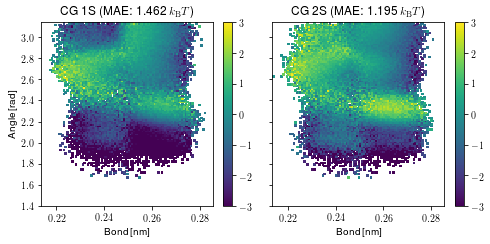

In [32]:
fesfmaa = (fes_fm-fes_aa).compressed()
mae_fmaa = np.mean([abs(fesfmaa[i]) for i in range(len(fesfmaa))])
fes2saa = (fes_2s-fes_aa).compressed()
mae_2saa = np.mean([abs(fes2saa[i]) for i in range(len(fes2saa))])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7,3.5))
ax1.set_xlabel("Bond [nm]")
ax2.set_xlabel("Bond [nm]")
ax1.set_ylabel("Angle [rad]")
ax1.set_title("CG 1S (MAE: "+str(np.around(mae_fmaa, decimals=3))+" $k_{\mathrm{B}}T$)")
ax2.set_title("CG 2S (MAE: "+str(np.around(mae_2saa, decimals=3))+" $k_{\mathrm{B}}T$)")
ax1.set_ylim([1.4,np.pi])
im1 = ax1.pcolormesh(X, Y, fes_fm - fes_aa, vmin=-3, vmax=3)
f.colorbar(im1, ax=ax1)
im2 = ax2.pcolormesh(X, Y, fes_2s - fes_aa, vmin=-3, vmax=3)
f.colorbar(im2, ax=ax2)
f.tight_layout()
plt.show()
f.savefig('deltasurfs_1-2.pdf', bbox_inches='tight')

/Users/bereau/soft/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


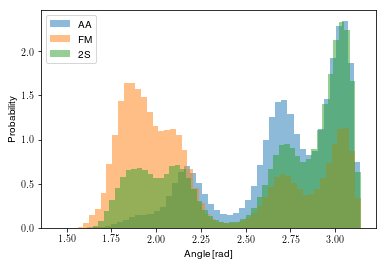

In [23]:
fig = plt.figure()
n, bins, patches = plt.hist(timeSer_aa.T[3]*np.pi/180, bins=50, normed=1, label='AA', alpha=0.5)
n, bins, patches = plt.hist(timeSer_fm.T[3], bins=50, normed=1, label='FM', alpha=0.5)
n, bins, patches = plt.hist(timeSer_2s.T[3], bins=50, normed=1, label='2S', alpha=0.5)
plt.legend(loc='upper left')
plt.xlabel('Angle [rad]')
plt.ylabel('Probability')
plt.show()
fig.savefig('angle_dist-2.pdf', bbox_inches='tight')

# CG Surface Hop 3S

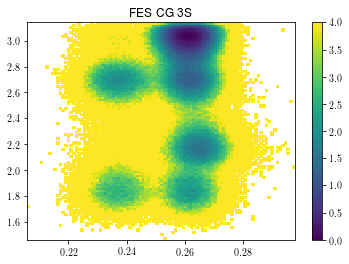

In [34]:
timeSer_3s = np.genfromtxt('3states/cvs_time.dat')
x, y = timeSer_3s.T[1], timeSer_3s.T[3]
H_3s, xedges, yedges = np.histogram2d(x, y, bins=100, normed=True)
H_3s = H_3s.T
X3, Y3 = np.meshgrid(xedges, yedges)
fes_3s = -np.ma.log(H_3s/H_3s.max())
plt.pcolormesh(X3, Y3, fes_3s, vmax=4.0)
plt.colorbar()
plt.title("FES CG 3S")
plt.show()

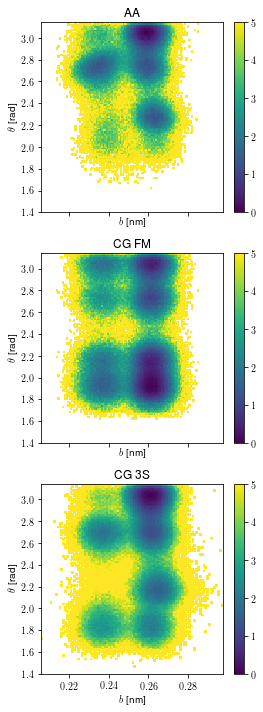

In [56]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, sharex=True, figsize=(4,10))
ax1.set_xlabel("$b$ [nm]")
ax2.set_xlabel("$b$ [nm]")
ax3.set_xlabel("$b$ [nm]")
ax1.set_ylabel("$\\theta$ [rad]")
ax2.set_ylabel("$\\theta$ [rad]")
ax3.set_ylabel("$\\theta$ [rad]")
ax1.set_title("AA   ")
ax2.set_title("CG FM")
ax3.set_title("CG 3S")
ax1.set_ylim([1.4,np.pi])
im1 = ax1.pcolormesh(X, Y, fes_aa, vmin=0, vmax=5)
f.colorbar(im1, ax=ax1)
im2 = ax2.pcolormesh(X, Y, fes_fm, vmin=0, vmax=5)
f.colorbar(im2, ax=ax2)
im3 = ax3.pcolormesh(X3, Y3, fes_3s, vmin=0, vmax=5)
f.colorbar(im3, ax=ax3)
f.tight_layout()
plt.show()
f.savefig('fes_aa-fm-3s.pdf', bbox_inches='tight')

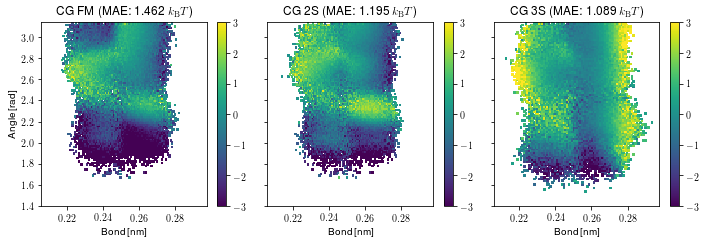

In [41]:
fesfmaa = (fes_fm-fes_aa).compressed()
mae_fmaa = np.mean([abs(fesfmaa[i]) for i in range(len(fesfmaa))])
fes2saa = (fes_2s-fes_aa).compressed()
mae_2saa = np.mean([abs(fes2saa[i]) for i in range(len(fes2saa))])
fes3saa = (fes_3s-fes_aa).compressed()
mae_3saa = np.mean([abs(fes3saa[i]) for i in range(len(fes3saa))])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(10,3.5))
ax1.set_xlabel("Bond [nm]")
ax2.set_xlabel("Bond [nm]")
ax3.set_xlabel("Bond [nm]")
ax1.set_ylabel("Angle [rad]")
ax1.set_title("CG FM (MAE: "+str(np.around(mae_fmaa, decimals=3))+" $k_{\mathrm{B}}T$)")
ax2.set_title("CG 2S (MAE: "+str(np.around(mae_2saa, decimals=3))+" $k_{\mathrm{B}}T$)")
ax3.set_title("CG 3S (MAE: "+str(np.around(mae_3saa, decimals=3))+" $k_{\mathrm{B}}T$)")
ax1.set_ylim([1.4,np.pi])
im1 = ax1.pcolormesh(X, Y, fes_fm - fes_aa, vmin=-3, vmax=3)
f.colorbar(im1, ax=ax1)
im2 = ax2.pcolormesh(X, Y, fes_2s - fes_aa, vmin=-3, vmax=3)
f.colorbar(im2, ax=ax2)
im3 = ax3.pcolormesh(X3, Y3, fes_3s - fes_aa, vmin=-3, vmax=3)
f.colorbar(im3, ax=ax3)
f.tight_layout()
plt.show()
f.savefig('deltasurfs_1-3.pdf', bbox_inches='tight')

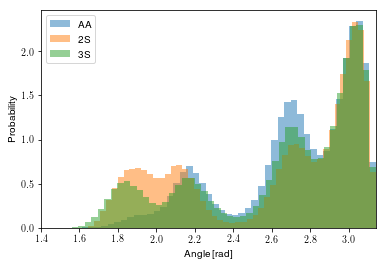

In [42]:
fig = plt.figure()
n, bins, patches = plt.hist(timeSer_aa.T[3]*np.pi/180, bins=50, normed=1, label='AA', alpha=0.5)
# n, bins, patches = plt.hist(timeSer_fm.T[3], bins=50, normed=1, label='FM', alpha=0.1)
n, bins, patches = plt.hist(timeSer_2s.T[3], bins=50, normed=1, label='2S', alpha=0.5)
n, bins, patches = plt.hist(timeSer_3s.T[3], bins=50, normed=1, label='3S', alpha=0.5)
plt.legend(loc='upper left')
plt.xlabel('Angle [rad]')
plt.ylabel('Probability')
plt.xlim([1.4,np.pi])
plt.show()
fig.savefig('angle_dist-3.pdf', bbox_inches='tight')

In [43]:
# AA
hist = np.histogram(timeSer_aa.T[3]*np.pi/180, bins='auto', normed=1)
x = [hist[0], 0.5*(hist[1][1:]+hist[1][:-1])]
np.savetxt('hist_aa_a.dat', np.array([x[1], x[0]]).T)
# CG
for mod in ["fm","2s","3s"]:
    hist = np.histogram(eval('timeSer_'+mod).T[3], bins='auto', normed=1)
    x = [hist[0], 0.5*(hist[1][1:]+hist[1][:-1])]
    fname = 'hist_'+mod+'_a.dat'
    np.savetxt(fname, np.array([x[1], x[0]]).T)

In [44]:
# Save FESs
def save_fes(filename, fes):
    open(filename, "w").close()
    fo = open(filename, "w")
    for i in range(len(X[0])-1):
        for j in range(len(Y.T[0])-1):
            xbin = X[0][j]+0.5*(X[0][j+1]-X[0][j])
            ybin = Y.T[0][i]+0.5*(Y.T[0][i+1]-Y.T[0][i])
            fo.write("{:.3f} {:.3f} {:.3f}\n".format(xbin, ybin,float(fes[i,j])))
        fo.write("\n")
    fo.close()

save_fes("fes_aa.dat", fes_aa)
save_fes("fes_fm.dat", fes_fm)
save_fes("fes_ybg.dat", fes_ybg)
save_fes("fes_2s.dat", fes_2s)
save_fes("fes_3s.dat", fes_3s)
save_fes("fes_fm-aa.dat", fes_fm-fes_aa)
save_fes("fes_ybg-aa.dat", fes_ybg-fes_aa)
save_fes("fes_2s-aa.dat", fes_2s-fes_aa)
save_fes("fes_3s-aa.dat", fes_3s-fes_aa)

/Users/bereau/soft/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Warning: converting a masked element to nan.
